In [5]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [6]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

/home/we/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [7]:
mnist
X,y=mnist.data,mnist.target

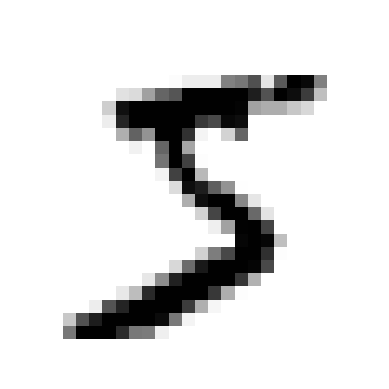

In [8]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    some_digit = X[0]
    plt.show()
plot_digit(X[0])

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
model=KNeighborsClassifier()
param_distr=[{'n_neighbors':[3,4,5],'weights':['uniform','distance']}]
random=GridSearchCV(model,param_distr,cv=3, verbose=3)
random.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  11.3s
[CV 2/3] END ....n_neighbors=3, weights=uniform;, score=0.968 total time=  11.0s
[CV 3/3] END ....n_neighbors=3, weights=uniform;, score=0.968 total time=  10.0s
[CV 1/3] END ...n_neighbors=3, weights=distance;, score=0.970 total time=   9.7s
[CV 2/3] END ...n_neighbors=3, weights=distance;, score=0.969 total time=   9.6s
[CV 3/3] END ...n_neighbors=3, weights=distance;, score=0.969 total time=   9.6s
[CV 1/3] END ....n_neighbors=4, weights=uniform;, score=0.966 total time=  10.1s
[CV 2/3] END ....n_neighbors=4, weights=uniform;, score=0.966 total time=  10.0s
[CV 3/3] END ....n_neighbors=4, weights=uniform;, score=0.967 total time=  10.4s
[CV 1/3] END ...n_neighbors=4, weights=distance;, score=0.971 total time=  11.5s
[CV 2/3] END ...n_neighbors=4, weights=distance;, score=0.970 total time=  11.0s
[CV 3/3] END ...n_neighbors=4, weights=distance;,

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [12]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9688

In [13]:
random.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [14]:
random.score(X_test,y_test)

0.9714

In [31]:
def shift(a,direction):
    a=a.reshape(28,28)
    a=scipy.ndimage.shift(a,direction,cval=0)
    return a.reshape(1,-1)


In [32]:
x_aug=X_train.copy()
y_aug=y_train.copy()

In [33]:
for d in [(1,0),(0,1),(-1,0),(0,-1)]:
    print(d)
    for image,label in zip(X_train,y_train):
        sh_image=shift(image,d)
        np.append(x_aug,sh_image)
        np.append(y_aug,label)

(1, 0)


KeyboardInterrupt: 

In [27]:
x_train.shape

(1000, 784)

(1, 1, 784)

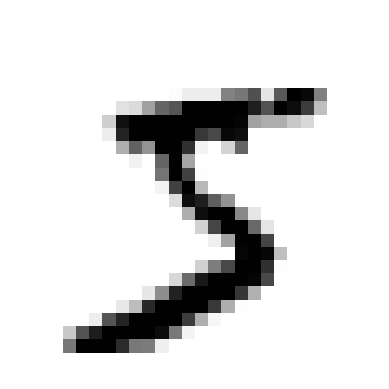

In [148]:
h=np.array(list(map(lambda x:shift(x,1,'u').reshape(1,-1),X_train[0:1])))
h.shape

In [32]:
x=[0]
y=x
x.append(1)
y

[0, 1]